In [1]:
import time
start_time = time.time()

In [2]:
## https://www.kaggle.com/code/monicabackes/diabetes-dx-logistic-regression/notebook 
## https://www.kaggle.com/datasets/nancyalaswad90/review/code
## https://www.kaggle.com/code/alexandrepetit881234/pima-indian-diabetes LR and RF
## https://www.kaggle.com/code/klilajaafer/multilayer-perceptron-mlp-with-pytorch accuracy 65
## https://www.kaggle.com/code/sakshamdewan777/decisiontreebasic dt basic
## https://www.kaggle.com/code/sakshamdewan777/randomforestbasic rf basic accurach 75
## https://www.kaggle.com/code/nisahhamidah/knn-mentari knn

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

import warnings

In [3]:
warnings.filterwarnings(action='ignore')

In [4]:
# Setting Style of Dataframes :
def style(df):
    formatted_df = df.applymap(lambda x: f'{x:.3f}' if isinstance(x, float) else x)
    styled_df = formatted_df.style.set_properties(**{'border': '1.3px solid blue',
                                           'color': 'darkblue',
                                           'background-color': '#C2DFFF'})    
    return styled_df

In [5]:
# Seaborn Plot Appearance Settings :
sns.set_style('whitegrid', rc=None)
cmap = sns.color_palette("Blues", as_cmap=True)

In [6]:
df = pd.read_csv('./pima-indians-diabetes.csv')

In [7]:
style(df.head())

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetespedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.600,0.627,50,1
1,1,85,66,29,0,26.600,0.351,31,0
2,8,183,64,0,0,23.300,0.672,32,1
3,1,89,66,23,94,28.100,0.167,21,0
4,0,137,40,35,168,43.100,2.288,33,1


In [8]:
print(f'Number of rows : {df.shape[0]}\nNumber of columns : {df.shape[1]}')

Number of rows : 768
Number of columns : 9


In [9]:
style(df.describe())

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetespedigreeFunction,Age,Outcome
count,768.000,768.000,768.000,768.000,768.000,768.000,768.000,768.000,768.000
mean,3.845,120.895,69.105,20.536,79.799,31.993,0.472,33.241,0.349
std,3.370,31.973,19.356,15.952,115.244,7.884,0.331,11.760,0.477
min,0.000,0.000,0.000,0.000,0.000,0.000,0.078,21.000,0.000
25%,1.000,99.000,62.000,0.000,0.000,27.300,0.244,24.000,0.000
50%,3.000,117.000,72.000,23.000,30.500,32.000,0.372,29.000,0.000
75%,6.000,140.250,80.000,32.000,127.250,36.600,0.626,41.000,1.000
max,17.000,199.000,122.000,99.000,846.000,67.100,2.420,81.000,1.000


In [10]:
duplicate_rows = df[df.duplicated(subset=df.columns,keep='first')]
if duplicate_rows.shape[0] == 0 :
    print('There are no duplicate data entries.')
else:
    df = df.drop_duplicates(keep='first')
    print(f'{duplicate_rows.shape[0]} duplicate values found and removed. {df.shape[0]} unique values remain.')

There are no duplicate data entries.


In [11]:
summary_table = pd.DataFrame({
    "Unique_values": df.nunique(),
    "Data_type": df.dtypes,
    "Null_count": df.isnull().sum(),
    "Null_percentage": (df.isnull().sum()/df.shape[0]*100).round(2)    
})
style(summary_table)

,Unique_values,Data_type,Null_count,Null_percentage
Pregnancies,17,int64,0,0.000
Glucose,136,int64,0,0.000
BloodPressure,47,int64,0,0.000
SkinThickness,51,int64,0,0.000
Insulin,186,int64,0,0.000
BMI,248,float64,0,0.000
DiabetespedigreeFunction,517,float64,0,0.000
Age,52,int64,0,0.000
Outcome,2,int64,0,0.000


In [12]:
df.isnull().sum().sum()

0

,Count
Labels,
Non-diabetic,500
Diabetic,268


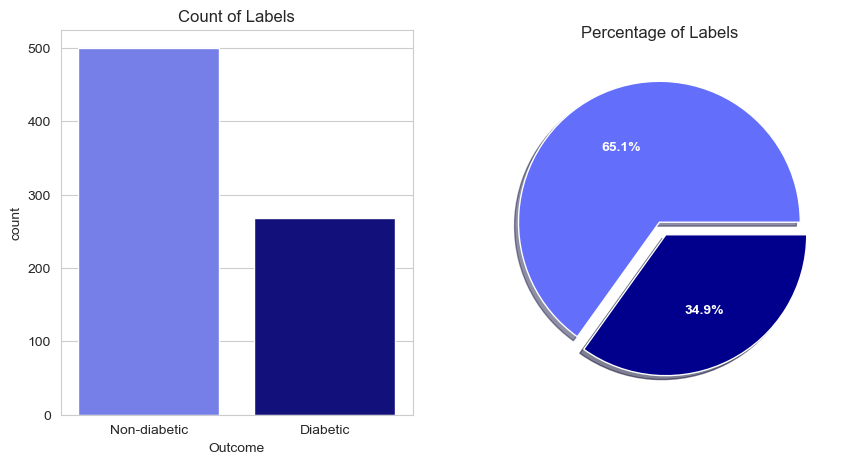

In [13]:
plt.figure(figsize=(10, 5))
colors = ['#636efb', '#01008c']
labels = ['Non-diabetic', 'Diabetic']

# count plot (counts) :
plt.subplot(1, 2, 1)
sns.countplot(x='Outcome', data=df, palette= colors)
plt.title('Count of Labels')
plt.xticks([0, 1], labels)

# value counts in class :
count_0 = df[df['Outcome'] == 0]['Outcome'].count()
count_1 = df[df['Outcome'] == 1]['Outcome'].count()
total_count = count_0 + count_1

# percentage of each value:
percentage_0 = (count_0 / total_count) * 100
percentage_1 = (count_1 / total_count) * 100

# pie chart (percentage):
plt.subplot(1, 2, 2)
plt.pie([percentage_0, percentage_1], labels=labels, autopct='%1.1f%%', colors=colors, shadow=True,
        explode = [0, 0.1],textprops={'color': 'white','weight': 'bold'})
plt.title('Percentage of Labels');

# Summary table:
class_counts = df['Outcome'].value_counts()
label_names = {0: 'Non-diabetic', 1: 'Diabetic'}
Outcome_counts_df = pd.DataFrame({'Labels': class_counts.index.map(label_names),
                                'Count': class_counts.values}
                              ).set_index('Labels')
Outcome_counts_df

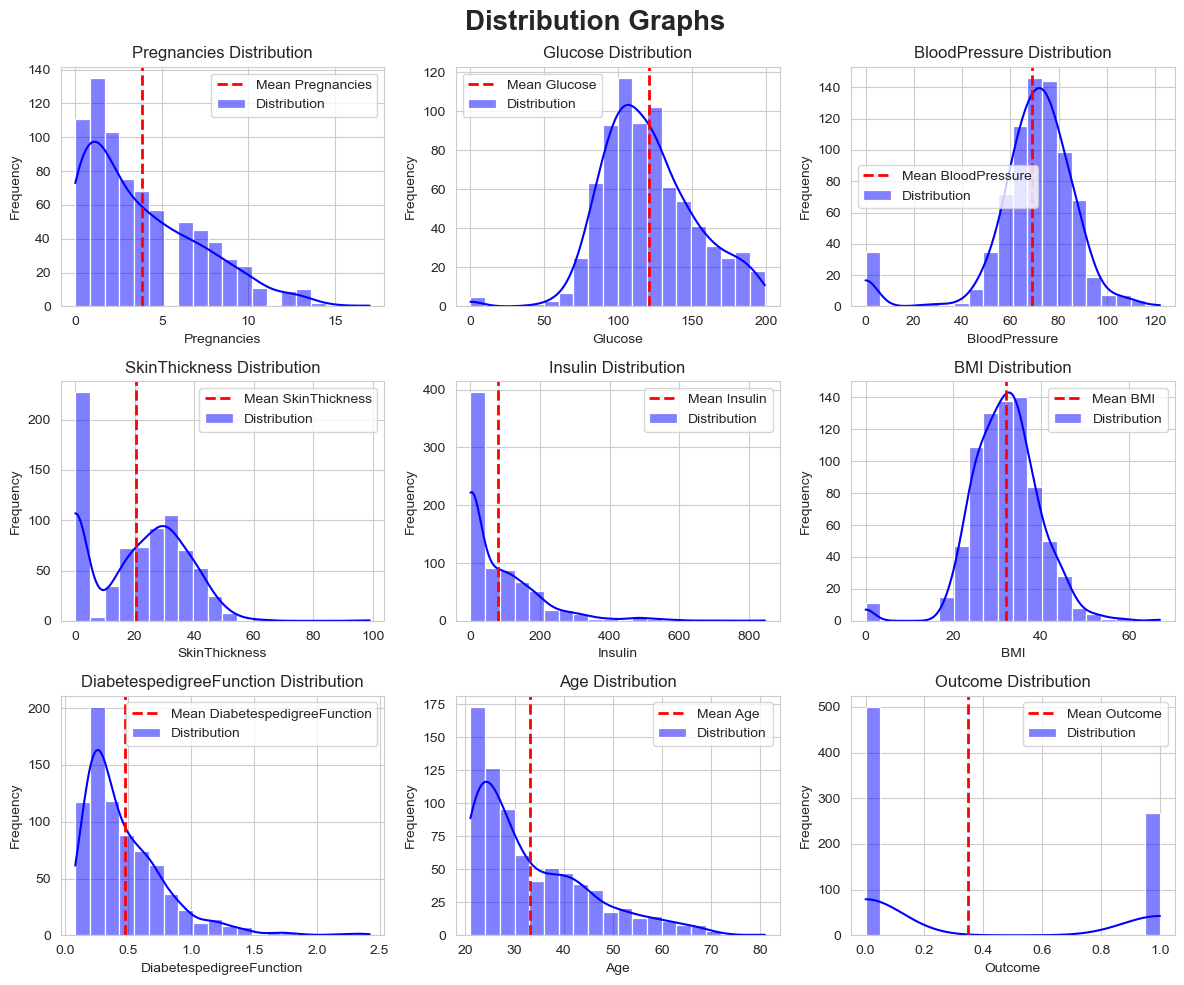

In [14]:
cols = df.columns
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 10))
axes = axes.flatten()  

for i, col in enumerate(cols):
    ax = axes[i]
    sns.histplot(df[col], bins=20, kde=True, color='blue', ax=ax, label='Distribution')
    
    mean_value = df[col].mean()
    ax.axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label=('Mean ' + col))
    
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')
    ax.legend()
    ax.set_title(col + ' Distribution')

fig.suptitle('Distribution Graphs', fontsize=20, fontweight='bold');
plt.tight_layout()
plt.show()

In [15]:
for column in df.columns:
    print(f"Skewness for {column}: {df[column].skew()}")
    print(f"Kurtosis for {column}: {df[column].kurt()}")

Skewness for Pregnancies: 0.9016739791518588
Kurtosis for Pregnancies: 0.15921977754746486
Skewness for Glucose: 0.17375350179188992
Kurtosis for Glucose: 0.6407798203735053
Skewness for BloodPressure: -1.8436079833551302
Kurtosis for BloodPressure: 5.180156560082496
Skewness for SkinThickness: 0.10937249648187608
Kurtosis for SkinThickness: -0.520071866153013
Skewness for Insulin: 2.272250858431574
Kurtosis for Insulin: 7.2142595543487715
Skewness for BMI: -0.42898158845356543
Kurtosis for BMI: 3.290442900816981
Skewness for DiabetespedigreeFunction: 1.919911066307204
Kurtosis for DiabetespedigreeFunction: 5.5949535279830584
Skewness for Age: 1.1295967011444805
Kurtosis for Age: 0.6431588885398942
Skewness for Outcome: 0.635016643444986
Kurtosis for Outcome: -1.600929755156027


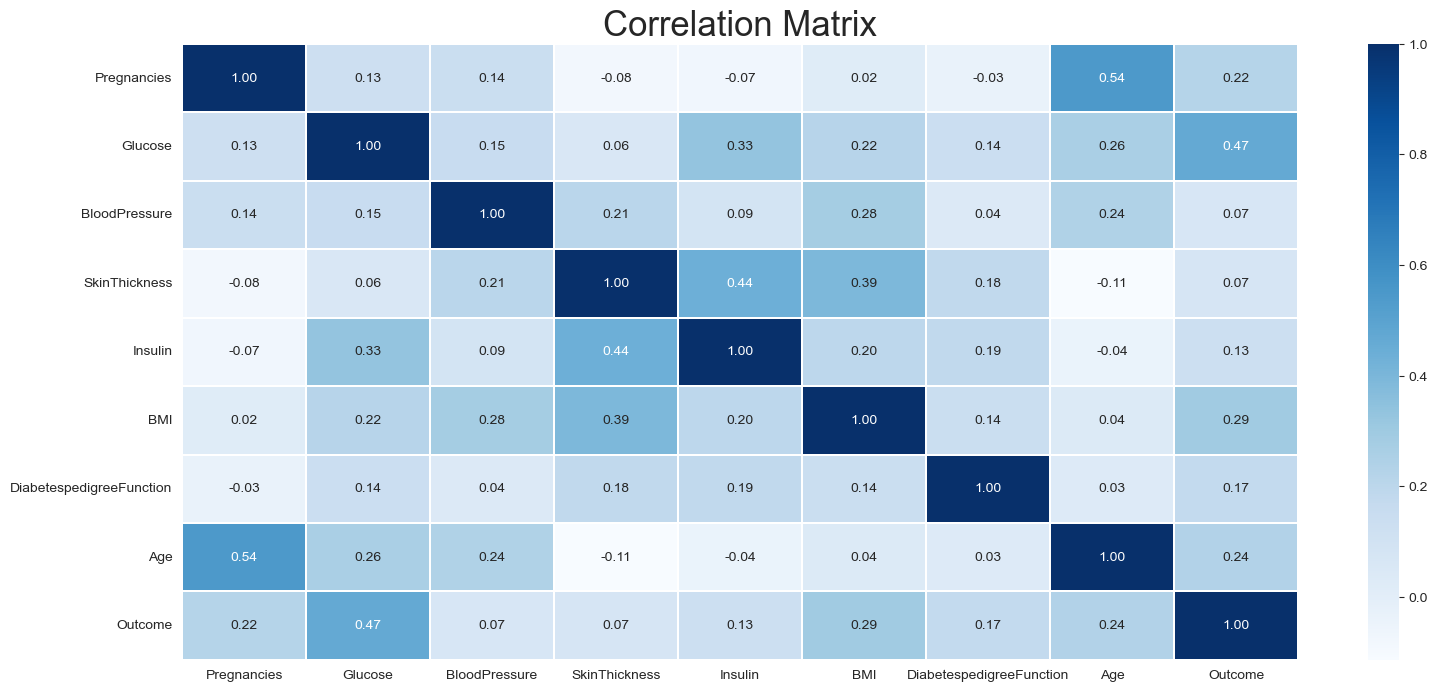

In [15]:
plt.figure(figsize=(18, 8))
plt.title('Correlation Matrix', fontsize=25)

sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", linewidth=.3, cmap=cmap);

In [16]:
corr = pd.DataFrame({'Correlation with Outcome': (df.corr(numeric_only=True)['Outcome'].sort_values(ascending=False) * 100).round(3)})
style(corr)

,Correlation with Outcome
Outcome,100.000
Glucose,46.658
BMI,29.269
Age,23.836
Pregnancies,22.190
DiabetespedigreeFunction,17.384
Insulin,13.055
SkinThickness,7.475
BloodPressure,6.507


In [17]:
min_values = df.describe().loc[['min']]
style(min_values)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetespedigreeFunction,Age,Outcome
min,0.000,0.000,0.000,0.000,0.000,0.000,0.078,21.000,0.000


In [19]:
#columns_zero = ['BloodPressure','SkinThickness','BMI']

# Replacing Zero values with mean :
#for i in columns_zero:
#    mean = df[df[i] != 0][i].mean()
#    df.replace({i: 0}, mean, inplace=True)

In [18]:
# Helthy individuals with zero test value :
non_diabetic_test_zero = df[(df['Outcome'] == 0) & (df['Insulin'] == 0)]

# Calculating mean test value of nondiabetic individuals :
non_diabetic_test_mean = df[df['Outcome'] == 0]['Insulin'].mean()

# Replacing the Zero test values of healthy individuals with the mean test value of nondiabetic individuals :
df.loc[(df['Outcome'] == 0) & (df['Insulin'] == 0), 'Insulin'] = non_diabetic_test_mean

print(f'Number of Healthy samples with zero test value: {non_diabetic_test_zero.shape[0]}') 
print(f'Average test value of the remaining healthy samples: {non_diabetic_test_mean}')

Number of Healthy samples with zero test value: 236
Average test value of the remaining healthy samples: 68.792


In [19]:
# Features:
X = df.iloc[:,:-1]

# Target :
y = df.iloc[:,-1:]

In [20]:
#ss = StandardScaler()
#X = ss.fit_transform(X)

In [21]:
X_train, X_test, y_train ,y_test = train_test_split(X, y, random_state = 42)

In [22]:
##Logistic regression model

In [23]:
logmodel = LogisticRegressionCV(class_weight='balanced', solver = 'liblinear', random_state=42)
logmodel.fit(X_train, y_train)

LogisticRegressionCV(class_weight='balanced', random_state=42,
                     solver='liblinear')

In [24]:
predictions = logmodel.predict(X_test)

In [25]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.82      0.67      0.74       123
           1       0.56      0.74      0.64        69

    accuracy                           0.70       192
   macro avg       0.69      0.71      0.69       192
weighted avg       0.73      0.70      0.70       192



In [29]:
predictions_prob = logmodel.predict_proba(X_test)[:, 1]

In [30]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, roc_curve, roc_auc_score
accuracy = accuracy_score(y_test, predictions)
recall = recall_score(y_test, predictions)
precision = precision_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

In [31]:
fpr, tpr, thresholds = roc_curve(y_test, predictions_prob)
roc_auc = roc_auc_score(y_test, predictions_prob)

In [33]:
conf_matrix = confusion_matrix(y_test, predictions)

In [43]:
print(conf_matrix)

[[83 40]
 [18 51]]


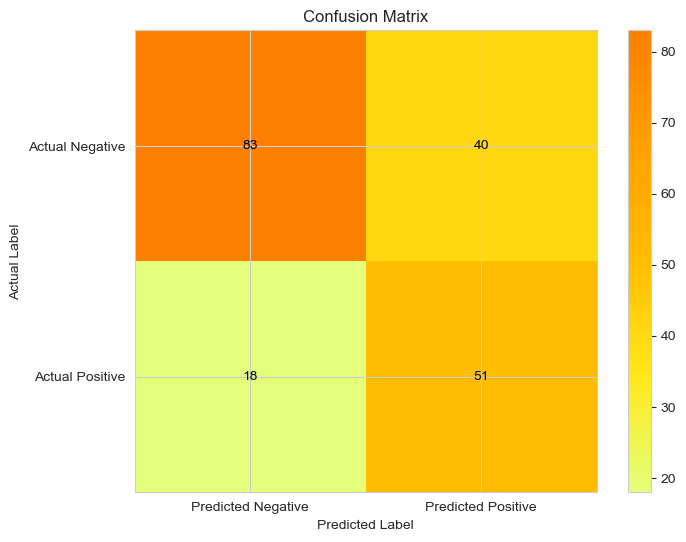

In [52]:
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Wistia)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xticks([0, 1], ['Predicted Negative', 'Predicted Positive'])
plt.yticks([0, 1], ['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')

for i in range(2):
    for j in range(2):
        plt.text(j, i, str(conf_matrix[i, j]), horizontalalignment='center', verticalalignment='center', color='black')

(0.0, 1.0)

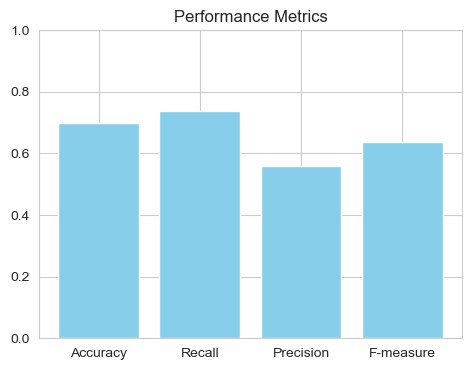

In [35]:
# Display Accuracy, Recall, Precision, and F-measure
plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.bar(['Accuracy', 'Recall', 'Precision', 'F-measure'], [accuracy, recall, precision, f1], color='skyblue')
plt.title('Performance Metrics')
plt.ylim(0, 1)

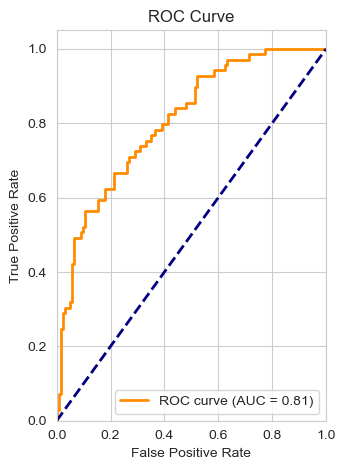

In [36]:
# Plot ROC Curve
plt.subplot(122)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')

plt.tight_layout()
plt.show()

In [37]:
end_time = time.time()
run_time = end_time - start_time
print(f"The total run time for this code on my i5 processor was: {run_time: .4}s")

The total run time for this code on my i5 processor was:  304.3s


In [38]:
coefficients = logmodel.coef_
determinants = df.drop('Outcome', axis=1).columns
risks = pd.DataFrame(columns=determinants, data=coefficients)
risks

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetespedigreeFunction,Age
0,0.059979,0.035538,-0.015724,0.01173,-0.004371,0.080881,0.527205,0.036798
